<a href="https://colab.research.google.com/github/philxhuang/udacity-projects/blob/master/4_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Dataset

In [0]:
import torch
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

In [0]:
def view_classify(img, ps, version="MNIST"):
   ''' Function for viewing an image and it's predicted classes.
   '''
   ps = ps.data.numpy().squeeze()

   fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
   ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
   ax1.axis('off')
   ax2.barh(np.arange(10), ps)
   ax2.set_aspect(0.1)
   ax2.set_yticks(np.arange(10))
   if version == "MNIST":
       ax2.set_yticklabels(np.arange(10))
   elif version == "Fashion":
       ax2.set_yticklabels(['T-shirt/top',
                           'Trouser',
                           'Pullover',
                           'Dress',
                           'Coat',
                           'Sandal',
                           'Shirt',
                           'Sneaker',
                           'Bag',
                           'Ankle Boot'], size='small');
   ax2.set_title('Class Probability')
   ax2.set_xlim(0, 1.1)

   plt.tight_layout()

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:01, 13817741.88it/s]                             


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 96190.46it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4056404.69it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 31571.53it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [4]:
images, labels = next(iter(trainset))
images, labels
images.shape

torch.Size([1, 28, 28])

Now that our dataset is loaded for both trianing and testing, we should start building the NN.

In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    # faltten the tensors in the trainset first
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)
    
    return x

Now load the model, make loss function, and make optimizer. The Adam optimizer (Adaptive Momentum Estimation) is quite difficult to undertand mathematically. This will not be covered here, as for your own education.

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [8]:
epoches = 5

for e in range(epoches):
  running_loss = 0
  for images, labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5082501355232969
Training loss: 0.39383049316402435
Training loss: 0.35801448565778704
Training loss: 0.3325361440589687
Training loss: 0.3206599159265505


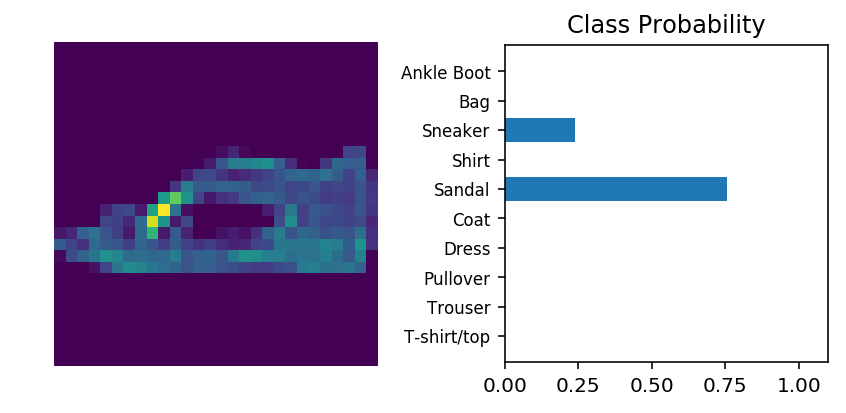

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')